# Name:-Sadgi Tiwari

## 1. Stock Prediction  using LSTM

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn


In [20]:
df=pd.read_csv("tesla.csv")

In [4]:
print(df.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  29-06-2010  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  30-06-2010  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  01-07-2010  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  02-07-2010  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  06-07-2010  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [5]:
closed_prices=df["Close"]

In [6]:
seq_len = 15

In [7]:
mm=MinMaxScaler()
scaled_price=mm.fit_transform(np.array(closed_prices)[...,None]).squeeze()

In [8]:
X=[]
Y=[]
for i in range(len(scaled_price)-seq_len):
    X.append(scaled_price[i:i+seq_len])
    Y.append(scaled_price[i+seq_len])
    
X=np.array(X)[...,None]
Y=np.array(Y)[...,None]

In [9]:
train_x=torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_x=torch.from_numpy(X[int(0.8*X.shape[0]):]).float()
train_y=torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_y=torch.from_numpy(Y[int(0.8*Y.shape[0]):]).float()

In [10]:
print(train_x.shape,test_x.shape)

torch.Size([1742, 15, 1]) torch.Size([436, 15, 1])


In [14]:
class Model(nn.Module):
    def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
    def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])
model = Model(1 , 64)

In [15]:
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
loss_fn = nn.MSELoss()

num_epochs = 100

for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output , train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

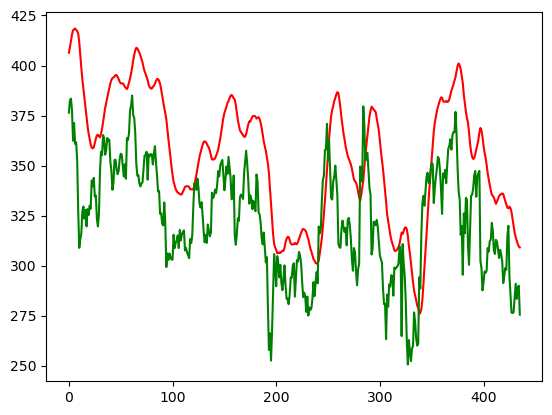

In [16]:
 if epoch % 10 == 0 and epoch != 0:
        print(epoch , "epoch loss" , loss.detach().numpy())

model.eval()
with torch.no_grad():
    output = model(test_x)

pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())

plt.plot(pred.squeeze() , color = "red" , label = "predicted")
plt.plot(real.squeeze() , color = "green" , label = "real")
plt.show()